# Capstone Project
Romeo Gamulescu

## Compare the neighborhoods of New York and Toronto and determine how similar or dissimilar they are. 

Table of Content

    1. Introduction to the Business Problem
    2. Data Sources
    3. Methodology
        3.1 Data acquisition, preparation and preprocessing for Toronto
        3.2 Data acquisition, preparation and preprocessing for New York
        3.3 Find Nearby Venues using Foursquare API
        3.4 Inferential statistical testing
        3.5 Machine Learning - Modeling, Visualization and Clustering
            3.5.1 k-means clustering ((Elbow Method,Silhouette Coefficient, Hierarchical clustering))
            3.5.2 Euclidean distances (Finding similar and dissimilar clusters)
    4. Results
    5. Discussion
    6. Conclusion


### 1. Introduction to the Business Problem

The aim of this project is to compare 4 venue clusters of boroughs in Toronto to 4 venue clusters of boroughs in New York to determine which clusters in the two cities are most similar and dissimilar to each other. 

We are going to investigate the similarities and dissimilarities between these two cities, using data science tools, such as classification using Foursquare data and machine learning segmentation and clustering.

Who will gain from this project:
- Organizations in the tourist industry 
- Companies that would like to invest in venues in these cities
- Public companies to make the right decisions on public policy regarding the development of different areas, e.g parks.

### 2. Data Sources
Based on the most common places captured from Foursquare, we are going to segment areas of Toronto and New York. K-mean clustering unsupervised machine learning algorithm will cluster the venues based on the place category such as restaurants, park, coffee shop, gym etc.
The following urls will be used in order to collect the data necessary for analysis:
- Toronto Postal Codes from Wikipedia:
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
- New York dataset that contains the 5 boroughs and the neighbourhoods that exist in each borough as well as the latitude and longitude coordinates or each neghbor5hood.
- Foursquare API: (https://foursquare.com/)
Performing location search, location sharing and details about a business. Photos, tips and reviews.
- Folium- Python visualization library used to visualize the neighbourhoods cluster distribution
Various libraries, such as pandas (for data analyses), json (to handle json files), geopy (to retrieve location data), sklearn (machine learning library), etc.

### 3. Methodology

The methodology used includes the following elements:

    3.1 Data acquisition, preparation and preprocessing for Toronto
        Acquire the dataset for Toronto from Wikipedia and the Cognitive lab
    
    3.2 Data acquisition, preparation and preprocessing for New York
        Acquire the dataset for New Yok from https://geo.nyu.edu/catalog/nyu_2451_34572
    
    3.3 Find Nearby Venues using Foursquare API
        Data regarding venues within 1000 meters of the latitudes and longitudes of the Toronto and New York are acquired from provider Foursquare. 
        
    3.4 Inferential statistical testing
        Dataframes are created grouped by borough and containing the mean of the frequency of occurrence of each category of venue. The top 5 and the top 10 most common venues are printed for each borough in Toronto and New York.
        
    3.5 Machine Learning - Modeling, Visualization and Clustering        
        3.5.1 k-means clustering (Elbow Method,Silhouette Coefficient, Hierarchical clustering)
        To find clusters of boroughs that are similar in terms of venues existing in such boroughs, we run the method of k-means clustering on the grouped data from Toronto and New York with the number of clusters set to 4. The resulting cluster labels are added to the datasets containing latitudes, longitudes, and most common venues. The clusters are visualized on folium maps for Toronto and New York. The feature vectors of the different clusters are stored in variables 'toronto_cluster_centers' and 'new_york_cluster_centers'.
        
        3.5.2 Euclidean distances
        To analyze similarities and dissimilarities between the clusters in Toronto and New York, Euclidean distances are calculated pairwise between the Toronto and New York clusters. The resulting scores are printed in ascending order. 

### 3.1 Data acquisition, preparation and preprocessing for Toronto
#### Importing the necessary libraries

In [138]:
import pandas as pd
import numpy as np
import requests
import json 
%matplotlib inline

In [139]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Download the data and review it

### First step is to acquire the dataset for Toronto from Wikipedia and the Cognitive lab

We use Pandas to capture html table and transform the data into a pandas dataframe.

In [140]:
toronto_html_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)
toronto_df = toronto_html_table[0]
toronto_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [141]:
# Explore the dataset
toronto_df.shape

(289, 3)

There are 289 rows and 3 columns

In [142]:
# Checking for null values
print(toronto_df.isnull().sum())

Postcode         0
Borough          0
Neighbourhood    0
dtype: int64


In [143]:
#Rename the columns
toronto_df.rename(columns = {"Postcode": "PostalCode", "Neighbourhood": "Neighborhood"}, inplace = True)

#replace ""Not assigned" to Nan
toronto_df.replace("Not assigned", np.nan, inplace=True)

#simply drop whole row with NaN in "Borough" column
toronto_df.dropna(subset=["Borough"],axis=0, inplace=True)

#reset index because we dropped row
toronto_df.reset_index(drop=True,inplace=True)

#Combine the rows with the same "Postcode", and make sure the neighbourhoods are separated with a comma
toronto_df = toronto_df.groupby(['PostalCode','Borough'])['Neighborhood'].apply(lambda x: ", ".join(x.astype(str))).reset_index()

# Review the first 5 lines in the dataset
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [144]:
#Make sure for any cell that has a borough and a "nan" neighbourhood, then the neighbourhood will be the same as borough
for borough_item,neighbourhood_item in zip(toronto_df.Borough, toronto_df.Neighborhood): 
    if neighbourhood_item == "nan":
        toronto_df.Neighborhood.replace(['nan'], [borough_item], inplace=True)

# Review the first 5 lines in the dataset               
toronto_df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [145]:
#print the number of rows and columns in the dataframe
toronto_df.shape

(103, 3)

There are 103 rows and 3 columns

Getting a list of coordinates (latitude and longitude) from the Cognitive lab (http://cocl.us/Geospatial_data)

In [146]:
#Getting the latitude and longitude for the Postal Code
# Use pands to convert the csv to dataframe
path="http://cocl.us/Geospatial_data"
lat_long = pd.read_csv(path)

#Rename column 
lat_long.rename(columns={"Postal Code":"PostalCode"},inplace=True)
lat_long.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [147]:
# Explore the dataset
lat_long.shape

(103, 3)

There are 103 rows and 3 columns

In [148]:
# Checking for null values
print(lat_long.isnull().sum())

PostalCode    0
Latitude      0
Longitude     0
dtype: int64


In [149]:
#Merge the two dataframes (toronto_df and lat_long) and set PostalCode as an index
toronto_data = pd.merge(toronto_df, lat_long, on='PostalCode')

# Review the first 5 lines in the dataset
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [150]:
#simply drop whole column "PostalCode"
toronto_neighborhoods=toronto_data.drop(["PostalCode"],axis=1)
toronto_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


In [151]:
#Check how many boroughs and neighbourhoods 
print('Toronto has {} boroughs and {} neighborhoods.'.format(
        len(toronto_neighborhoods['Borough'].unique()),
        toronto_neighborhoods.shape[0]
    )
)

Toronto has 11 boroughs and 103 neighborhoods.


In [152]:
# Check the dataset data type
toronto_neighborhoods.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

#### Get the geographical coordinates of Toronto and visualize the boroughs with various postal codes

In [153]:
# Use geopy library to get the latitude and longitude values of Toronto city
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
toronto_latitude = location.latitude
toronto_longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'], toronto_neighborhoods['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto


### 3.2 Data acquisition, preparation and preprocessing for New York

Acquire the dataset for New Yok from https://geo.nyu.edu/catalog/nyu_2451_34572

In [223]:
# Accessing the dataset located at: https://geo.nyu.edu/catalog/nyu_2451_34572
import urllib.request, json 
with urllib.request.urlopen("https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json") as url:
    newyork_data = json.loads(url.read().decode())
    print(newyork_data )

{'type': 'FeatureCollection', 'totalFeatures': 306, 'features': [{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.2', 'geometry': {'type': 'Point', 'coordinates': [-73.82993910812398, 40.87429419303012]}, 'geometry_name': 'geom', 'properties': {'name': 'Co-op City', 'stacked': 2, 'annoline1': 'Co-op', 'annoline2': 'City', 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.82993910812398, 40.87429419303012, -73.82993910812398, 40.87429419303012]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.3', 'geometry': {'type': 'Point', 'coordinates': [-73.82780644716412, 40.887555677350775]}, 'geometry_n

In [224]:
# The relevant data is in the features key (n.b. a list of the neighborhoods)
new_york_neighborhoods_data = newyork_data['features']

In [225]:
# Check the first item in this list
new_york_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [226]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
new_york_neighborhoods = pd.DataFrame(columns=column_names)

In [227]:
# loop through the data and fill the dataframe one row at a time
for data in new_york_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    new_york_neighborhoods = new_york_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [228]:
# Review the first 5 lines in the dataset
new_york_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [229]:
# Review the dataset
new_york_neighborhoods.shape

(306, 4)

The dataset has 306 rows and 5 columns

In [230]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(new_york_neighborhoods['Borough'].unique()),
        new_york_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Get the geographical coordinates of New York and visualize the boroughs 

In [231]:
# Use geopy library to get the latitude and longitude values of New York city
address = 'New York City, NY'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
new_york_latitude = location.latitude
new_york_longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_new_york = folium.Map(location=[new_york_latitude, new_york_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(new_york_neighborhoods['Latitude'], new_york_neighborhoods['Longitude'], new_york_neighborhoods['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_new_york)  
    
map_new_york

### 3.3  Find Nearby Venues using Foursquare API

In [233]:
#Define Foursquare credentials and version
CLIENT_ID = 'YSMOX4XNDJEA0KA2U3POQOWDR2W1H1IAZ132F1GJVETNODMY' # your Foursquare ID
CLIENT_SECRET = 'PXQHDCJ4B12ZGXMTUVH1YJIS1XGHZSU3MU5YNJS3OUUSQUDZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YSMOX4XNDJEA0KA2U3POQOWDR2W1H1IAZ132F1GJVETNODMY
CLIENT_SECRET:PXQHDCJ4B12ZGXMTUVH1YJIS1XGHZSU3MU5YNJS3OUUSQUDZ


In [161]:
# Retrieve the latitude and longitude
neighborhood_latitude = toronto_neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

In [162]:
# Calling Foursquare API

from urllib.request import urlopen
import requests
import folium # map rendering library
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import re

LIMIT = 100 
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c5e1aec4c1f674520e1e231'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 17,
  'suggestedBounds': {'ne': {'lat': 43.81568630900001,
    'lng': -79.18190576146081},
   'sw': {'lat': 43.797686290999984, 'lng': -79.20680103853921}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d669cba83865481c948fa53',
       'name': 'Images Salon & Spa',
       'location': {'address': '8130 Sheppard Ave E',
        'crossStreet': 'Morningside Ave',
        'lat': 43.80228301948931,
        'lng': -79.19856472801668,
        'labeledLatLngs'

In [163]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get nearby Venues on each borough in Toronto

In [213]:
def getNearbyVenues(borough, names, latitudes, longitudes, radius=1000):
    LIMIT = 50
    venues_list=[]
    for bor, name, lat, lng in zip(borough,names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        res_json = requests.get(url).json()
        if "response" in res_json:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        else:
            venues_list.append([(
            '',
            name, 
            lat, 
            lng, 
            '', 
            0, 
            0,  
            '')])
            continue
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            v['venue']['id'], 
            bor,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Id', 
                  'Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [214]:
# Using Foursquare, getting the neaby venues in Toronto
toronto_venues = getNearbyVenues(  borough = toronto_neighborhoods['Borough'],
                                   names = toronto_neighborhoods['Neighborhood'],
                                   latitudes = toronto_neighborhoods['Latitude'],
                                   longitudes = toronto_neighborhoods['Longitude'])

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The D

In [219]:
# To avoid the limitation of the free Foursquare API (limited use per day), we save the dataset to a csv file
toronto_venues.to_csv('toronto_venues_saved.csv', encoding='utf-8', index=True)

In [220]:
# Retrieve the saved dataset, "toronto_venues_saved"
toronto_venues_saved = pd.read_csv("toronto_venues_saved.csv",index_col=0)

#print the number of rows and columns in the dataframe
print(toronto_venues_saved.shape)

#print the number of neighborhoods
print('The dataframe has {} neighborhoods.'.format(toronto_venues_saved.shape[0]))

# Review the first 5 lines in the dataset
toronto_venues_saved.head()

(3345, 9)
The dataframe has 3345 neighborhoods.


,Id,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4d669cba83865481c948fa53,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,4b914562f964a520d4ae33e3,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant
2,579a91b3498e9bd833afa78a,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,4b6718c2f964a5203f3a2be3,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Harvey's,43.800106,-79.198258,Fast Food Restaurant
4,4bb6b9446edc76b0d771311c,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant


In [216]:
toronto_venues_saved.groupby('Borough').count()

,Id,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,,,
Central Toronto,373,373,373,373,373,373,373,373
Downtown Toronto,828,828,828,828,828,828,828,828
East Toronto,245,245,245,245,245,245,245,245
East York,202,202,202,202,202,202,202,202
Etobicoke,231,231,231,231,231,231,231,231
Mississauga,48,48,48,48,48,48,48,48
North York,552,552,552,552,552,552,552,552
Queen's Park,50,50,50,50,50,50,50,50
Scarborough,383,383,383,383,383,383,383,383


In [217]:
toronto_venues_saved.groupby('Venue Category').count()['Id'].nlargest(10)

Venue Category
Coffee Shop             247
Café                    144
Pizza Place             117
Park                    115
Italian Restaurant       88
Bakery                   84
Restaurant               75
Grocery Store            69
Fast Food Restaurant     61
Sandwich Place           61
Name: Id, dtype: int64

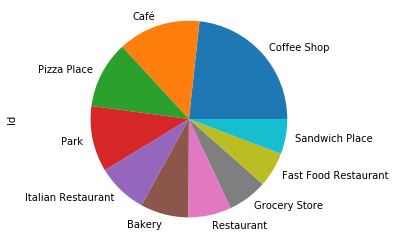

In [218]:
toronto_venues_saved.groupby('Venue Category').count()['Id'].nlargest(10).plot(kind='pie')
plt.axis('equal')
plt.show()

#### Check how many venues were returned for each borough

In [221]:
toronto_venues_saved.groupby('Borough').count()

,Id,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,,,
Central Toronto,373,373,373,373,373,373,373,373
Downtown Toronto,828,828,828,828,828,828,828,828
East Toronto,245,245,245,245,245,245,245,245
East York,202,202,202,202,202,202,202,202
Etobicoke,231,231,231,231,231,231,231,231
Mississauga,48,48,48,48,48,48,48,48
North York,552,552,552,552,552,552,552,552
Queen's Park,50,50,50,50,50,50,50,50
Scarborough,383,383,383,383,383,383,383,383


#### Find out how many unique categories can be curated from all the returned venues


In [222]:
print('There are {} unique categories.'.format(len(toronto_venues_saved['Venue Category'].unique())))

There are 313 unique categories.


#### Get nearby Venues on each borough in New York

In [234]:
# Retrieve the latitude and Longitude
neighborhood_latitude = new_york_neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = new_york_neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

In [235]:
# Calling Foursquare API

from urllib.request import urlopen
import requests
import folium # map rendering library
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import re

LIMIT = 100 
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c5e2f8b1ed2192b5bc90131'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 53,
  'suggestedBounds': {'ne': {'lat': 40.903705185610015,
    'lng': -73.83531662200086},
   'sw': {'lat': 40.88570516760999, 'lng': -73.85908441909719}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'ln

In [236]:
# Using Foursquare, getting the neaby venues in New York
new_york_venues = getNearbyVenues(  borough = new_york_neighborhoods['Borough'],
                                   names = new_york_neighborhoods['Neighborhood'],
                                   latitudes = new_york_neighborhoods['Latitude'],
                                   longitudes = new_york_neighborhoods['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [237]:
# To avoid the limitation of the free Foursquare API (limited use per day), we save the dataset to a csv file
new_york_venues.to_csv('new_york_venues_saved.csv', encoding='utf-8', index=True)

In [238]:
# Retrieve the saved dataset, "new_york_venues_saved.csv"
new_york_venues_saved = pd.read_csv("new_york_venues_saved.csv",index_col=0)

#print the number of rows and columns in the dataframe
print(new_york_venues_saved.shape)

#print the number of neighborhoods
print('The dataframe has {} neighborhoods.'.format(new_york_venues_saved.shape[0]))

# Review the first 5 lines in the dataset
new_york_venues_saved.head()

(13220, 9)
The dataframe has 13220 neighborhoods.


,Id,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4c537892fd2ea593cb077a28,Bronx,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,4d375ce799fe8eec99fd2355,Bronx,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,4c10f6aece57c92804a682d2,Bronx,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,4d6af9426107f04dedeb297a,Bronx,Wakefield,40.894705,-73.847201,Rite Aid,40.896521,-73.844680,Pharmacy
4,4c9e50e38afca09379b2ff15,Bronx,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant


In [243]:
new_york_venues_saved.groupby('Borough').count()

,Id,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,,,
Bronx,2295,2295,2295,2295,2295,2295,2295,2295
Brooklyn,3132,3132,3132,3132,3132,3132,3132,3132
Manhattan,1873,1873,1873,1873,1873,1873,1873,1873
Queens,3309,3309,3309,3309,3309,3309,3309,3309
Staten Island,1926,1926,1926,1926,1926,1926,1926,1926


In [244]:
new_york_venues_saved.groupby('Venue Category').count()['Id'].nlargest(10)

Venue Category
Pizza Place           736
Italian Restaurant    392
Donut Shop            343
Coffee Shop           330
Deli / Bodega         293
Bakery                287
Sandwich Place        285
Chinese Restaurant    267
Pharmacy              265
Park                  258
Name: Id, dtype: int64

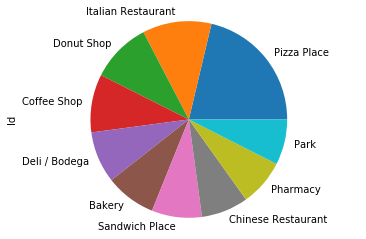

In [245]:
new_york_venues_saved.groupby('Venue Category').count()['Id'].nlargest(10).plot(kind='pie')
plt.axis('equal')
plt.show()

In [239]:
# Find out how many unique categories can be curated from all the returned venues
print('There are {} unique categories.'.format(len(new_york_venues_saved['Venue Category'].unique())))

There are 432 unique categories.


#### Determine which venues are in both Toronto and New York

In [240]:
new_york_toronto_venues_set=set(toronto_venues_saved['Venue Category'].unique()).intersection(new_york_venues_saved['Venue Category'].unique())
new_york_toronto_venues_set

{'Accessories Store',
 'Adult Boutique',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport Lounge',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Candy Store',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chiropractor',
 'Chocolate Shop',
 'Church

#### Retain only those venues that are in the new_york_toronto_venues_set for both Toronto and New York

In [241]:
toronto_venues = toronto_venues_saved.loc[toronto_venues_saved['Venue Category'].isin(new_york_toronto_venues_set)]
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))
new_york_venues = new_york_venues_saved.loc[new_york_venues_saved['Venue Category'].isin(new_york_toronto_venues_set)]
print('There are {} unique categories.'.format(len(new_york_venues['Venue Category'].unique())))
print(toronto_venues.shape)
print(new_york_venues.shape)

There are 276 unique categories.
There are 276 unique categories.
(3288, 9)
(12535, 9)


### Analyzing each borough in Toronto

In [246]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Borough'] = toronto_venues['Borough'] 

# move neighborhood column to the first column
list_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[list_columns]

toronto_onehot.head()

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Scarborough,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [247]:
# Check the dataframe size
toronto_onehot.shape

(3288, 277)

### 3.4 Inferential statistical testing

#### Group rows by borough and by taking the mean of the frequency of occurrence of each category

In [248]:
toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()
toronto_grouped.head()

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Central Toronto,0.0,0.000000,0.000000,0.0,0.000000,0.008197,0.0,0

In [249]:
# Check the size of the dataset
toronto_grouped.shape

(11, 277)

#### Print each borough along with the top 5 most common venues

In [250]:
num_top_venues = 5

for borough in toronto_grouped['Borough']:
    print("----"+borough+"----")
    temp = toronto_grouped[toronto_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Toronto----
                venue  freq
0         Coffee Shop  0.08
1  Italian Restaurant  0.07
2                Café  0.07
3    Sushi Restaurant  0.04
4                Park  0.04


----Downtown Toronto----
         venue  freq
0         Café  0.08
1  Coffee Shop  0.07
2        Hotel  0.03
3         Park  0.03
4   Restaurant  0.03


----East Toronto----
              venue  freq
0       Coffee Shop  0.07
1            Bakery  0.05
2  Greek Restaurant  0.04
3               Pub  0.04
4              Park  0.04


----East York----
               venue  freq
0        Coffee Shop  0.10
1               Café  0.04
2        Pizza Place  0.04
3  Indian Restaurant  0.03
4       Burger Joint  0.03


----Etobicoke----
            venue  freq
0            Park  0.06
1     Coffee Shop  0.06
2     Pizza Place  0.05
3        Pharmacy  0.05
4  Sandwich Place  0.04


----Mississauga----
                       venue  freq
0                Coffee Shop  0.10
1                      Hotel  0.06
2  

#### Returning Toronto venues in descending order

In [251]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create new dataframe and display top 10 venues for each borough in Toronto

In [252]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_boroughs_venues_sorted = pd.DataFrame(columns=columns)
toronto_boroughs_venues_sorted['Borough'] = toronto_grouped['Borough']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
1,Downtown Toronto,Café,Coffee Shop,Restaurant,Hotel,Park,Italian Restaurant,American Restaurant,Gastropub,Japanese Restaurant,Bakery
2,East Toronto,Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
3,East York,Coffee Shop,Pizza Place,Café,Grocery Store,Sandwich Place,Brewery,Indian Restaurant,Burger Joint,Park,Skating Rink
4,Etobicoke,Park,Coffee Shop,Pizza Place,Pharmacy,Grocery Store,Sandwich Place,Bank,Italian Restaurant,American Restaurant,Café


### 3.5 Machine Learning - Modeling, Visualization and Clustering

To find clusters of boroughs that are similar in terms of venues existing in such boroughs, the method of k-means clustering is run on the grouped data from Toronto and New York with a specific number of clusters set . 

 ### 3.5.1 k-means clustering

#### Cluster Models for Toronto - k-Means model to get the number of clusters

In [253]:
from sklearn.cluster import KMeans

#### Confirm the optimal value for k in k-Means clustering via the elbow method:

In [254]:
sum_of_squared_distances = []
K = range(1,10)

toronto_grouped_cluster = toronto_grouped.drop('Borough', 1)

for k in K:
    #print('Modeling k-Means with k=%i'%(k))
    km = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_cluster)
    sum_of_squared_distances.append(km.inertia_)


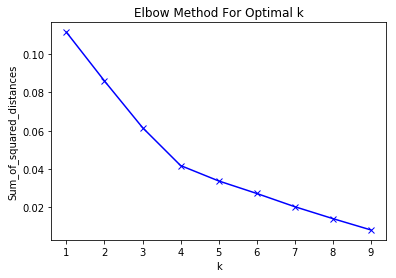

In [255]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### We further investigate the optimum cluster number by using Silhoutette Coefficient

##### Silhouette Coefficient

To find the optimal value of the number of clusters, k, the number of clusters is iterated corresponding Silhouette Coefficientis calculated for each of the k-values used. The highest Silhouette Coefficient gives the best match to its own cluster. 

In [256]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 11):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(toronto_grouped_cluster)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(toronto_grouped_cluster, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.13581935337056758
Where n_clusters = 3, the Silhouette Coefficient is 0.16115860382448244
Where n_clusters = 4, the Silhouette Coefficient is 0.17554721088100375
Where n_clusters = 5, the Silhouette Coefficient is 0.09357755423280714
Where n_clusters = 6, the Silhouette Coefficient is 0.052185886540541286
Where n_clusters = 7, the Silhouette Coefficient is 0.03615247647190892
Where n_clusters = 8, the Silhouette Coefficient is 0.03235511213616857
Where n_clusters = 9, the Silhouette Coefficient is 0.03968718659671806
Where n_clusters = 10, the Silhouette Coefficient is 0.01596242771685612


#### From the Silhouette Coefficient, it seems the optimal number of clusters is 4

### Hierarchical clustering

#### To further refine the in investigation in finding out which neighborhoods are very similar to each other, we can use hierarchical clustering.

Creating a dendrogram to determine which neighbourhoods are similar to each other:

In [257]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [258]:
# Create the cluster model:
Z = linkage(toronto_grouped_cluster, 'ward')

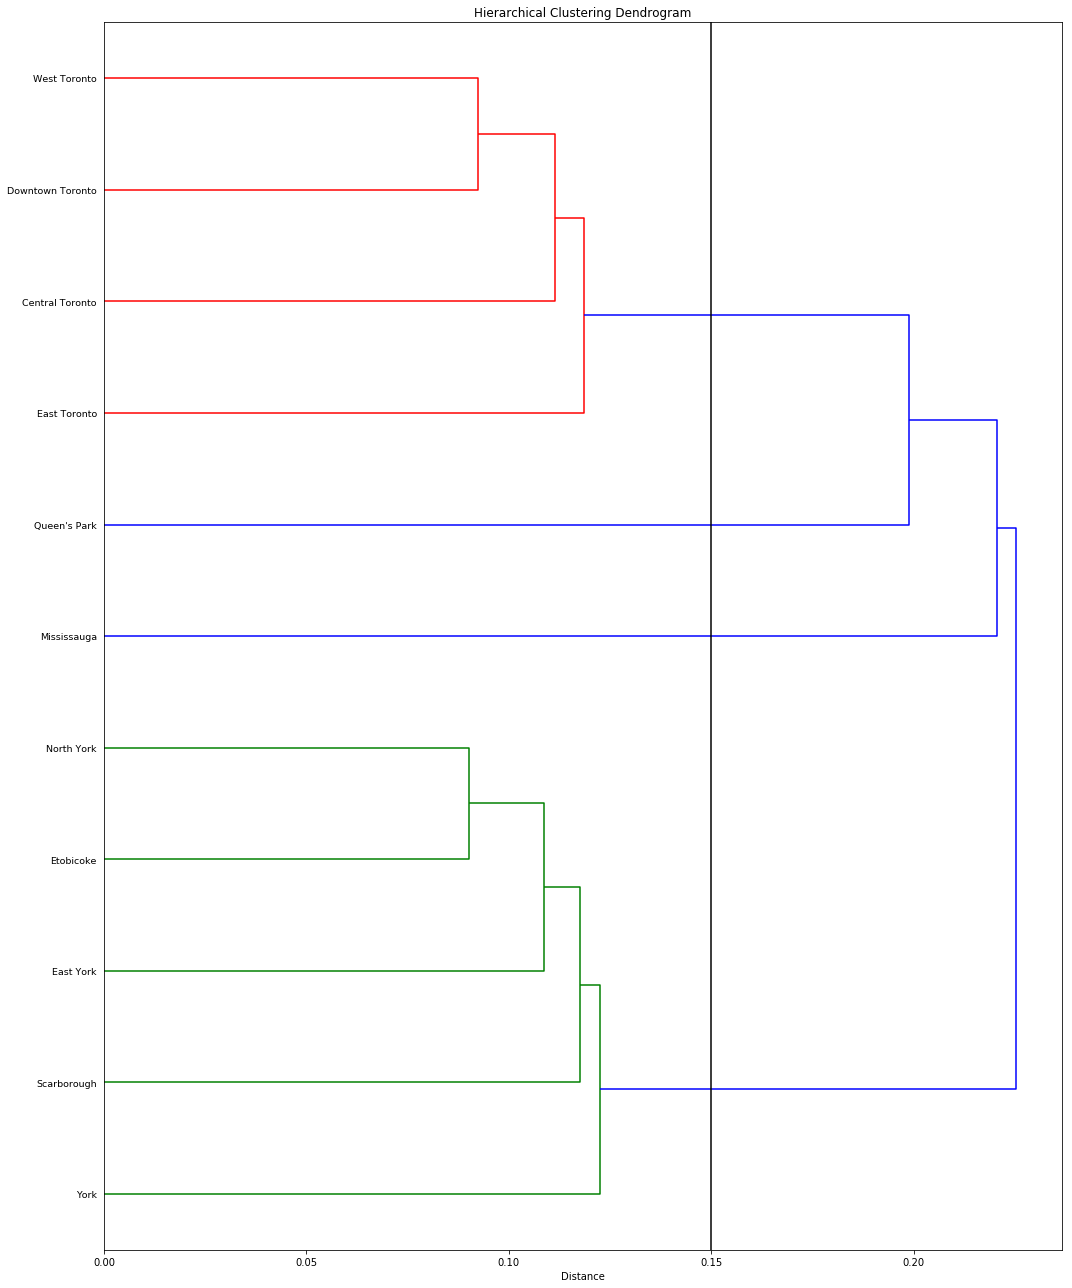

In [260]:
# calculate full dendrogram
df_temp=toronto_grouped.copy()
fig=plt.figure(figsize=(15, 18))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')

label_list=df_temp['Borough']
label_list=label_list.tolist()

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    orientation='right',
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=9.5,  # font size for the x axis labels
    labels=label_list,
    #show_contracted=True
)


# Create a color palette with 2 colors (for Toronto and New York)
my_palette = plt.cm.get_cmap("seismic", 2)

ax = plt.gca()
xlbls = ax.get_ymajorticklabels()

# cutoff line
d_max=0.15
plt.axvline(x=d_max, c='k', label='cutoff line')
fig.tight_layout()
plt.savefig("dendrogram.pdf",format='pdf')
plt.show()

#### Run k-means to cluster boroughs

In [261]:
clusters = fcluster(Z, d_max, criterion='distance')
clusters

array([2, 2, 2, 1, 1, 4, 1, 3, 1, 2, 1], dtype=int32)

In [262]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1])

#### Includes the cluster as well as the top 10 venues for each borough

In [263]:
# add clustering labels
toronto_boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [264]:
toronto_merged = toronto_neighborhoods

# merge toronto_neighborhoods with toronto_boroughs_venues_sorted to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_boroughs_venues_sorted.set_index('Borough'), on='Borough')

toronto_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
3,Scarborough,Woburn,43.770992,-79.216917,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
4,Scarborough,Cedarbrae,43.773136,-79.239476,1,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank


#### Visualize the resulting clusters

In [265]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_toronto_clusters = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [(i+1) + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i**2) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto_clusters)
    
legend_html =   '''
                <div style="position: fixed; 
                            top: 50px; left: 50px; width: 100px; height: 100px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Cluster 0 &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
                              &nbsp; Cluster 1 &nbsp; <i class="fa fa-circle" style="color:#4000ff"></i><br>
                              &nbsp; Cluster 2 &nbsp; <i class="fa fa-circle" style="color:#0080d9"></i><br>
                              &nbsp; Cluster 3 &nbsp; <i class="fa fa-circle" style="color:#41ff7f"></i><br>
                              
                </div>
                ''' 
       
map_toronto_clusters.get_root().html.add_child(folium.Element(legend_html))  
map_toronto_clusters

### Examine Toronto clusters

#### Cluster 1

In [266]:
toronto_cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,The Beaches,Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
41,"The Danforth West, Riverdale",Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
42,"The Beaches West, India Bazaar",Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
43,Studio District,Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
44,Lawrence Park,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
45,Davisville North,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
46,North Toronto West,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
47,Davisville,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
48,"Moore Park, Summerhill East",Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
49,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place


#### Cluster 2

In [267]:
toronto_cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rouge, Malvern",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
1,"Highland Creek, Rouge Hill, Port Union",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
2,"Guildwood, Morningside, West Hill",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
3,Woburn,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
4,Cedarbrae,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
5,Scarborough Village,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
6,"East Birchmount Park, Ionview, Kennedy Park",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
7,"Clairlea, Golden Mile, Oakridge",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
8,"Cliffcrest, Cliffside, Scarborough Village West",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank
9,"Birch Cliff, Cliffside West",Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,Park,Pharmacy,Grocery Store,Sandwich Place,Bank


#### Cluster 3

In [268]:
toronto_cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
85,Queen's Park,Coffee Shop,Bubble Tea Shop,Park,Sushi Restaurant,Gastropub,Breakfast Spot,Burger Joint,Burrito Place,Sandwich Place,Salon / Barbershop


#### Cluster 4

In [269]:
toronto_cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
86,Canada Post Gateway Processing Centre,Coffee Shop,Middle Eastern Restaurant,Hotel,Sushi Restaurant,Indian Restaurant,Asian Restaurant,Mexican Restaurant,Chinese Restaurant,Fried Chicken Joint,Restaurant


#### Store kmeans.cluster_centers_ which contains the feature vectors of the different clusters in variable toronto_cluster_centers

In [270]:
toronto_cluster_centers=kmeans.cluster_centers_
toronto_cluster_centers.shape

(4, 276)

### Analyzing each borough in New York

In [271]:
# one hot encoding
new_york_onehot = pd.get_dummies(new_york_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
new_york_onehot['Borough'] = new_york_venues['Borough'] 

# move neighborhood column to the first column
list_columns = [new_york_onehot.columns[-1]] + list(new_york_onehot.columns[:-1])
new_york_onehot = new_york_onehot[list_columns]

new_york_onehot.head()

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [272]:
# Check the dataframe size
new_york_onehot.shape

(12535, 277)

#### Group rows by borough and by taking the mean of the frequency of occurrence of each category

In [273]:
new_york_grouped = new_york_onehot.groupby('Borough').mean().reset_index()
new_york_grouped.head()

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bronx,0.001307,0.000000,0.000000,0.001743,0.000000,0.010458,0.000

In [274]:
# Check the size of the dataset
new_york_grouped.shape

(5, 277)

#### Print each borough along with the top 5 most common venues

In [275]:
num_top_venues = 5

for borough in new_york_grouped['Borough']:
    print("----"+borough+"----")
    temp = new_york_grouped[new_york_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronx----
            venue  freq
0     Pizza Place  0.08
1      Donut Shop  0.05
2   Deli / Bodega  0.03
3  Sandwich Place  0.03
4        Pharmacy  0.03


----Brooklyn----
                  venue  freq
0           Pizza Place  0.06
1                   Bar  0.03
2  Caribbean Restaurant  0.03
3           Coffee Shop  0.03
4                Bakery  0.03


----Manhattan----
                 venue  freq
0   Italian Restaurant  0.04
1          Coffee Shop  0.04
2                 Café  0.03
3  American Restaurant  0.03
4                 Park  0.03


----Queens----
                venue  freq
0         Pizza Place  0.05
1              Bakery  0.03
2          Donut Shop  0.03
3  Chinese Restaurant  0.03
4  Italian Restaurant  0.03


----Staten Island----
                venue  freq
0         Pizza Place  0.06
1  Italian Restaurant  0.05
2            Bus Stop  0.05
3       Deli / Bodega  0.03
4          Bagel Shop  0.03




#### Returning New York venues in descending order

In [276]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create new dataframe and display top 10 venues for each borough in New York

In [277]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
new_york_boroughs_venues_sorted = pd.DataFrame(columns=columns)
new_york_boroughs_venues_sorted['Borough'] = new_york_grouped['Borough']

for ind in np.arange(new_york_grouped.shape[0]):
    new_york_boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(new_york_grouped.iloc[ind, :], num_top_venues)

new_york_boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
1,Brooklyn,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
2,Manhattan,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
3,Queens,Pizza Place,Chinese Restaurant,Donut Shop,Bakery,Deli / Bodega,Italian Restaurant,Pharmacy,Bank,Coffee Shop,Sandwich Place
4,Staten Island,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant


### Cluster Models for New York

#### We use a k-Means model to get the number of clusters

Confirm the optimal value for k in k-Means clustering via the elbow method:

In [278]:
# set number of clusters
kclusters = 4

new_york_grouped_cluster = new_york_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(new_york_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([3, 1, 2, 1, 0])

#### Includes the cluster as well as the top 10 venues for each borough

In [279]:
# add clustering labels
new_york_boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [280]:
new_york_merged = new_york_neighborhoods

# merge new_york_grouped with new_york_neighborhoods to add latitude/longitude for each neighborhood
new_york_merged = new_york_merged.join(new_york_boroughs_venues_sorted.set_index('Borough'), on='Borough')

new_york_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,3,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
1,Bronx,Co-op City,40.874294,-73.829939,3,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
2,Bronx,Eastchester,40.887556,-73.827806,3,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
3,Bronx,Fieldston,40.895437,-73.905643,3,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
4,Bronx,Riverdale,40.890834,-73.912585,3,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner


### Visualize the resulting clusters

In [281]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_new_york_clusters = folium.Map(location=[new_york_latitude, new_york_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [(i+1) + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i**2) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_york_merged['Latitude'], new_york_merged['Longitude'], new_york_merged['Borough'], new_york_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_new_york_clusters)
    
legend_html =   '''
                <div style="position: fixed; 
                            top: 50px; left: 50px; width: 100px; height: 100px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Cluster 0 &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
                              &nbsp; Cluster 1 &nbsp; <i class="fa fa-circle" style="color:#4000ff"></i><br>
                              &nbsp; Cluster 2 &nbsp; <i class="fa fa-circle" style="color:#0080d9"></i><br>
                              &nbsp; Cluster 3 &nbsp; <i class="fa fa-circle" style="color:#41ff7f"></i><br>
                              
                </div>
                ''' 

map_new_york_clusters.get_root().html.add_child(folium.Element(legend_html))      
map_new_york_clusters
   

## Examine New York clusters

#### Cluster 1

In [282]:
new_york_cluster1 = new_york_merged.loc[new_york_merged['Cluster Labels'] == 0, new_york_merged.columns[[1] + list(range(5, new_york_merged.shape[1]))]]
new_york_cluster1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
197,St. George,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
198,New Brighton,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
199,Stapleton,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
200,Rosebank,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
201,West Brighton,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
202,Grymes Hill,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
203,Todt Hill,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
204,South Beach,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
205,Port Richmond,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant
206,Mariner's Harbor,Pizza Place,Italian Restaurant,Bus Stop,Deli / Bodega,Donut Shop,Pharmacy,Sandwich Place,Bagel Shop,Chinese Restaurant,American Restaurant


#### Cluster 2

In [283]:
new_york_cluster2 = new_york_merged.loc[new_york_merged['Cluster Labels'] == 1, new_york_merged.columns[[1] + list(range(5, new_york_merged.shape[1]))]]
new_york_cluster2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,Bay Ridge,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
47,Bensonhurst,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
48,Sunset Park,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
49,Greenpoint,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
50,Gravesend,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
51,Brighton Beach,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
52,Sheepshead Bay,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
53,Manhattan Terrace,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
54,Flatbush,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant
55,Crown Heights,Pizza Place,Coffee Shop,Caribbean Restaurant,Bar,Bakery,Donut Shop,Grocery Store,Ice Cream Shop,Café,Italian Restaurant


#### Cluster 3

In [284]:
new_york_cluster3 = new_york_merged.loc[new_york_merged['Cluster Labels'] == 2, new_york_merged.columns[[1] + list(range(5, new_york_merged.shape[1]))]]
new_york_cluster3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Marble Hill,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
100,Chinatown,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
101,Washington Heights,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
102,Inwood,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
103,Hamilton Heights,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
104,Manhattanville,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
105,Central Harlem,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
106,East Harlem,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
107,Upper East Side,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
108,Yorkville,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center


#### Cluster 4

In [285]:
new_york_cluster4 = new_york_merged.loc[new_york_merged['Cluster Labels'] == 3, new_york_merged.columns[[1] + list(range(5, new_york_merged.shape[1]))]]
new_york_cluster4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
1,Co-op City,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
2,Eastchester,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
3,Fieldston,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
4,Riverdale,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
5,Kingsbridge,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
7,Woodlawn,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
8,Norwood,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
9,Williamsbridge,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
10,Baychester,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner


#### Store kmeans.cluster_centers_ which contains the feature vectors of the different clusters in variable new_york_cluster_centers

In [286]:
new_york_cluster_centers=kmeans.cluster_centers_
new_york_cluster_centers.shape

(4, 276)

### 3.5.2 Euclidean distances

#### In order to find out the harmonies between the different clusters in Toronto and New York, we can use Euclidean distance.
Euclidean distance will be calculated pairwise between the Toronto and New York clusters resulting in an Euclidean distance matrix. 
This distance matrix will be sorted retaining the indexes. Then the Euclidean distance scores between the different cluster centers will be printed in ascending order.

In [287]:
import scipy.spatial.distance as dist
import numpy as np

edm = np.zeros((4,4))
for i in range(0, 4):
    for j in range(0, 4):
        edm[i][j]=dist.euclidean(toronto_cluster_centers[i], new_york_cluster_centers[j])

idx=np.argsort(edm, axis=None)     
rows, cols = np.unravel_index(idx, edm.shape)
edm_sorted = edm[rows, cols]
for r, c, v in zip(rows, cols, edm_sorted):
     print('toronto_cluster_centers['+'0123'[r]+']', '&', 'new_york_cluster_centers['+'0123'[c]+']', ':', v)

toronto_cluster_centers[0] & new_york_cluster_centers[2] : 0.07722458279781953
toronto_cluster_centers[1] & new_york_cluster_centers[1] : 0.09269896645980633
toronto_cluster_centers[0] & new_york_cluster_centers[1] : 0.10389096164053752
toronto_cluster_centers[1] & new_york_cluster_centers[2] : 0.11295894787828172
toronto_cluster_centers[1] & new_york_cluster_centers[3] : 0.11469562568222803
toronto_cluster_centers[1] & new_york_cluster_centers[0] : 0.11554118744667474
toronto_cluster_centers[0] & new_york_cluster_centers[0] : 0.13443395177286602
toronto_cluster_centers[0] & new_york_cluster_centers[3] : 0.14414376020934339
toronto_cluster_centers[2] & new_york_cluster_centers[2] : 0.1690769752723988
toronto_cluster_centers[3] & new_york_cluster_centers[2] : 0.17146764766418476
toronto_cluster_centers[3] & new_york_cluster_centers[1] : 0.18121427216411493
toronto_cluster_centers[2] & new_york_cluster_centers[1] : 0.18572088602649758
toronto_cluster_centers[2] & new_york_cluster_centers

#### From above print, the most similar cluster centers are toronto_cluster_centers[0] & new_york_cluster_centers[2]

#### Examining toronto_cluster_centers[0] and new_york_cluster_centers[2]

In [288]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,The Beaches,Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
41,"The Danforth West, Riverdale",Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
42,"The Beaches West, India Bazaar",Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
43,Studio District,Coffee Shop,Bakery,Greek Restaurant,Park,Pub,Italian Restaurant,Pizza Place,Café,Bar,Indian Restaurant
44,Lawrence Park,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
45,Davisville North,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
46,North Toronto West,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
47,Davisville,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
48,"Moore Park, Summerhill East",Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place
49,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Park,Pizza Place,Gym,Japanese Restaurant,Thai Restaurant,Sandwich Place


In [289]:
new_york_merged.loc[new_york_merged['Cluster Labels'] == 2, new_york_merged.columns[[1] + list(range(5, new_york_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Marble Hill,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
100,Chinatown,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
101,Washington Heights,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
102,Inwood,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
103,Hamilton Heights,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
104,Manhattanville,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
105,Central Harlem,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
106,East Harlem,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
107,Upper East Side,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center
108,Yorkville,Coffee Shop,Italian Restaurant,American Restaurant,Park,Café,Mexican Restaurant,Bakery,Pizza Place,Gym,Gym / Fitness Center


#### These clusters indeed seem rather similar. 

### The most dissimilar cluster centers are:
toronto_cluster_centers[3] & new_york_cluster_centers[3] : 0.20981415848170787
toronto_cluster_centers[2] & new_york_cluster_centers[3] : 0.21256545486662504

Let's re-examine these clusters side by side.

In [290]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
85,Queen's Park,Coffee Shop,Bubble Tea Shop,Park,Sushi Restaurant,Gastropub,Breakfast Spot,Burger Joint,Burrito Place,Sandwich Place,Salon / Barbershop


In [291]:
new_york_merged.loc[new_york_merged['Cluster Labels'] == 3, new_york_merged.columns[[1] + list(range(5, new_york_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
1,Co-op City,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
2,Eastchester,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
3,Fieldston,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
4,Riverdale,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
5,Kingsbridge,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
7,Woodlawn,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
8,Norwood,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
9,Williamsbridge,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner
10,Baychester,Pizza Place,Donut Shop,Fast Food Restaurant,Supermarket,Deli / Bodega,Italian Restaurant,Pharmacy,Sandwich Place,Park,Diner


#####  From above, we see these clusters look very different indeed. 

### Let's see the usage of all the clusters in Toronto and New York

In [292]:
toronto_clust_sizes = pd.DataFrame(toronto_merged['Cluster Labels'].value_counts())
toronto_clust_sizes.index.name = 'Cluster ID Toronto'
toronto_clust_sizes.columns = ['Count']
toronto_clust_sizes['Percentage'] = np.round((toronto_clust_sizes['Count']/toronto_clust_sizes['Count'].sum())*100 , 1)

display(toronto_clust_sizes)

,Count,Percentage
Cluster ID Toronto,,
1,63,61.2
0,38,36.9
3,1,1.0
2,1,1.0


In [293]:
new_york_clust_sizes = pd.DataFrame(new_york_merged['Cluster Labels'].value_counts())
new_york_clust_sizes.index.name = 'Cluster ID New York'
new_york_clust_sizes.columns = ['Count']
new_york_clust_sizes['Percentage'] = np.round((new_york_clust_sizes['Count']/new_york_clust_sizes['Count'].sum())*100 , 1)

display(new_york_clust_sizes)

,Count,Percentage
Cluster ID New York,,
1,151,49.3
0,63,20.6
3,52,17.0
2,40,13.1


In [294]:
# First define a helper function.  Takes in a dataframe, which has all the rows (neighborhoods)
# in the same cluster, but only columns for 1st, 2nd and 3rd most common venue type.  Then print
# out the most common venue types in that cluster (or in clusters top 3 venue types).
def print_top_venues_from_df(data_df):
    cluster_size = data_df.shape[0]
    top_venues_list = []
    for row in data_df.values:
        top_venues_list.extend(row)

    top_venues_d = {}
    for venue in top_venues_list:
        if venue in top_venues_d:
            top_venues_d[venue] = top_venues_d[venue] + 1
        else:
            top_venues_d[venue] = 1

    for venue in top_venues_d:
        occurrence = 100 * top_venues_d[venue] / cluster_size
        if occurrence >= 10:
            print("{0:2.0f}% -- {1}".format(occurrence, venue))

print("\n\nprint_top_venues_from_df() defined\n")



print_top_venues_from_df() defined



In [295]:
# For each cluster, see which venues made it into the top 5 for each neighborhood in Toronto
# percentage tells us how many of the cluster's neighborhoods had that type of venue in
# its top five venues.

print("\n\nRESULTS: Cluster venue types in Toronto")

for toronto_cluster_id in range(kclusters):

    one_cluster_toronto = toronto_merged[toronto_merged['Cluster Labels'] == toronto_cluster_id]
    top5_of_cluster_toronto = one_cluster_toronto.iloc[:,6:11]

    print("\nCluster {0} ({1} neighborhoods), venues in top 5:".format(toronto_cluster_id, top5_of_cluster_toronto.shape[0]))
    print_top_venues_from_df(top5_of_cluster_toronto)

print("\n")



RESULTS: Cluster venue types in Toronto

Cluster 0 (38 neighborhoods), venues in top 5:
29% -- Bakery
13% -- Greek Restaurant
84% -- Park
13% -- Pub
100% -- Italian Restaurant
24% -- Café
24% -- Sushi Restaurant
24% -- Pizza Place
63% -- Coffee Shop
63% -- Restaurant
47% -- Hotel
16% -- Bar

Cluster 1 (63 neighborhoods), venues in top 5:
27% -- Chinese Restaurant
65% -- Fast Food Restaurant
92% -- Pizza Place
27% -- Bakery
73% -- Park
65% -- Grocery Store
38% -- Japanese Restaurant
35% -- Sandwich Place
27% -- Coffee Shop
19% -- Pharmacy

Cluster 2 (1 neighborhoods), venues in top 5:
100% -- Bubble Tea Shop
100% -- Park
100% -- Sushi Restaurant
100% -- Gastropub
100% -- Breakfast Spot

Cluster 3 (1 neighborhoods), venues in top 5:
100% -- Middle Eastern Restaurant
100% -- Hotel
100% -- Sushi Restaurant
100% -- Indian Restaurant
100% -- Asian Restaurant




In [296]:
# For each cluster, see which venues made it into the top 5 for each neighborhood in New York
# percentage tells us how many of the cluster's neighborhoods had that type of venue in
# its top five venues.

print("\n\nRESULTS: Cluster venue types in New York")

for new_york_cluster_id in range(kclusters):

    one_cluster_new_york = new_york_merged[new_york_merged['Cluster Labels'] == new_york_cluster_id]
    top5_of_cluster_new_york = one_cluster_new_york.iloc[:,6:11]

    print("\nCluster {0} ({1} neighborhoods), venues in top 5:".format(new_york_cluster_id, top5_of_cluster_new_york.shape[0]))
    print_top_venues_from_df(top5_of_cluster_new_york)

print("\n")



RESULTS: Cluster venue types in New York

Cluster 0 (63 neighborhoods), venues in top 5:
100% -- Italian Restaurant
100% -- Bus Stop
100% -- Deli / Bodega
100% -- Donut Shop
100% -- Pharmacy

Cluster 1 (151 neighborhoods), venues in top 5:
46% -- Coffee Shop
46% -- Caribbean Restaurant
46% -- Bar
100% -- Bakery
100% -- Donut Shop
54% -- Chinese Restaurant
54% -- Deli / Bodega
54% -- Italian Restaurant

Cluster 2 (40 neighborhoods), venues in top 5:
100% -- Italian Restaurant
100% -- American Restaurant
100% -- Park
100% -- Café
100% -- Mexican Restaurant

Cluster 3 (52 neighborhoods), venues in top 5:
100% -- Donut Shop
100% -- Fast Food Restaurant
100% -- Supermarket
100% -- Deli / Bodega
100% -- Italian Restaurant




<h2>4. Results</h2>

Using Inferential statistical testing, the rows of the Toronto and New York datasets were each grouped by borough and by taking the mean of the frequency of occurrence of each category. 


By using Machine learning method, k-means clustering was run on the grouped data from Toronto and New York with the number of clusters set to 4 using the Elbow Method and the Silhouette Coefficient. The results were feature vectors based on the frequency of the different venues. These feature vectors were stored in variables and compared by calculating Euclidean distances pairwise between the clusters in Toronto and New York. 

Reviewing the Euclididan distance, we notice the most similar cluster centers are:
toronto_cluster_centers[0] & new_york_cluster_centers[2] : 0.07722458279781953

The most common venues in these clusters are Italian Restaurants, Park and Café

Cluster 0 (38 neighborhoods), venues in top 5 in Toronto:
* 29% -- Bakery
* 13% -- Greek Restaurant
* 84% -- Park
* 13% -- Pub
* 100% -- Italian Restaurant
* 24% -- Café
* 24% -- Sushi Restaurant
* 24% -- Pizza Place
* 63% -- Coffee Shop
* 63% -- Restaurant
* 47% -- Hotel
* 16% -- Bar



Cluster 2 (40 neighborhoods), venues in top 5 in New York:
* 100% -- Italian Restaurant
* 100% -- American Restaurant
* 100% -- Park
* 100% -- Café
* 100% -- Mexican Restaurant



The most dissimilar cluster centers are:

toronto_cluster_centers[2] & new_york_cluster_centers[3] : 0.21256545486662504

The most common venues in these clusters are shown below:

Cluster 2 (1 neighborhoods), venues in top 5 in Toronto:
* 100% -- Bubble Tea Shop
* 100% -- Park
* 100% -- Sushi Restaurant
* 100% -- Gastropub
* 100% -- Breakfast Spot


Cluster 3 (52 neighborhoods), venues in top 5 New York:
* 100% -- Donut Shop
* 100% -- Fast Food Restaurant
* 100% -- Supermarket
* 100% -- Deli / Bodega
* 100% -- Italian Restaurant

<h2>5. Discussion</h2>

The results show which clusters of boroughs and neighborhoods in Toronto and New York are most similar and dissimilar and which venues are most commonly found in those clusters. It appears that the centers of both cities are quite similar in terms of venues found. For interested parties, this may mean that knowledge about venues in one city center can be used for decisions to be made about the other city center. As an example, an organization in the tourist industry may be able to point out similarities between both cities that may be of interest to its customers. Dissimilarities may point to unique aspects of Toronto and New York. 

Companies that would like to invest in venues in these cities may use their experience in one city to determine where to invest in the other city. There will be a great advantage knowing to investing in similar clusters or in clusters that are dissimilar. 

For public companies knowing the similarities and dissimilarities between clusters of venues in Toronto and New York would help them to make the right decisions on public policy regarding the development of different areas, e.g parks.

<h2>6. Conclusion</h2>

This project has compared 4 clusters of boroughs in Toronto to 4 clusters of boroughs in New York to determine which clusters are most similar and dissimilar. The result of this investigation would help the tourist industry that aim to attract more clients or organizations exploring venues in either of these cities looking for business opportunities in the other city. Also would be beneficial to policy makers looking to enhance the attractiveness of these cities for businesses and inhabitants. 